In [38]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

from dateutil import relativedelta
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

2.1.4


In [5]:
df = pd.read_excel('data/train.xlsx', parse_dates=True, date_format='%Y-%m-%d')
df.head()

,PRICES,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
0,2007-01-01,24.31,24.31,21.71,8.42,0.01,0.01,0.02,0.01,0.01,...,15.00,10.00,8.17,27.77,37.99,33.11,37.99,33.00,36.48,30.65
1,2007-01-02,16.01,11.00,9.01,7.50,9.00,7.45,16.50,28.01,29.96,...,37.57,36.45,37.99,53.00,59.69,50.09,50.00,36.22,31.09,29.84
2,2007-01-03,28.00,24.50,24.15,18.99,15.50,23.11,29.01,39.73,43.81,...,43.21,43.99,48.00,57.00,60.99,55.51,51.77,34.51,39.31,38.05
3,2007-01-04,31.01,28.69,27.00,24.20,12.02,27.00,28.00,34.85,41.31,...,40.01,38.00,42.66,53.00,58.99,53.50,44.01,35.00,34.46,31.57
4,2007-01-05,22.00,19.50,17.55,15.91,11.40,22.65,27.30,34.00,40.01,...,40.06,38.00,38.61,49.84,53.00,45.91,36.74,29.61,30.61,27.51


In [6]:
df.isna().sum()
# what a wonderful people <3

PRICES     0
Hour 01    0
Hour 02    0
Hour 03    0
Hour 04    0
Hour 05    0
Hour 06    0
Hour 07    0
Hour 08    0
Hour 09    0
Hour 10    0
Hour 11    0
Hour 12    0
Hour 13    0
Hour 14    0
Hour 15    0
Hour 16    0
Hour 17    0
Hour 18    0
Hour 19    0
Hour 20    0
Hour 21    0
Hour 22    0
Hour 23    0
Hour 24    0
dtype: int64

In [7]:
df.describe()

,PRICES,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2008-07-01 12:00:00,38.838120,33.993558,30.053896,24.881168,23.124434,28.803768,36.652199,50.544790,56.924398,...,58.981095,54.614881,53.981651,60.162509,67.466077,62.436697,58.464252,50.285712,50.451268,45.259334
min,2007-01-01 00:00:00,0.010000,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,8.030000,1.000000,0.010000,0.010000,1.000000,10.410000,5.530000,8.360000,18.920000,16.090000
25%,2007-10-01 18:00:00,25.407500,22.000000,19.007500,13.435000,11.237500,17.927500,21.977500,30.000000,34.982500,...,37.615000,34.605000,33.602500,35.000000,36.040000,36.405000,35.905000,34.040000,35.085000,30.850000
50%,2008-07-01 12:00:00,33.470000,29.465000,26.025000,21.685000,20.000000,25.725000,32.895000,43.590000,49.000000,...,49.930000,46.850000,45.030000,49.895000,55.990000,55.825000,51.000000,43.545000,41.960000,37.395000
75%,2009-04-01 06:00:00,52.850000,46.352500,40.717500,34.000000,31.942500,39.405000,52.187500,71.950000,76.775000,...,75.000000,70.000000,69.567500,74.992500,80.792500,79.302500,73.017500,65.960000,66.465000,60.977500
max,2009-12-31 00:00:00,500.000000,180.000000,200.000000,160.000000,160.000000,160.000000,150.500000,179.320000,227.130000,...,950.000000,950.000000,950.000000,769.470000,1762.540000,1066.820000,2500.000000,300.030000,180.000000,210.100000
std,NaN,21.884887,16.453507,15.947602,14.585498,14.436540,15.899613,20.775206,28.969477,30.775903,...,39.279068,38.096263,40.691564,46.205986,75.780436,45.182318,77.865406,22.377123,20.360752,19.155459


In [8]:
data_cols = df.columns[1:]

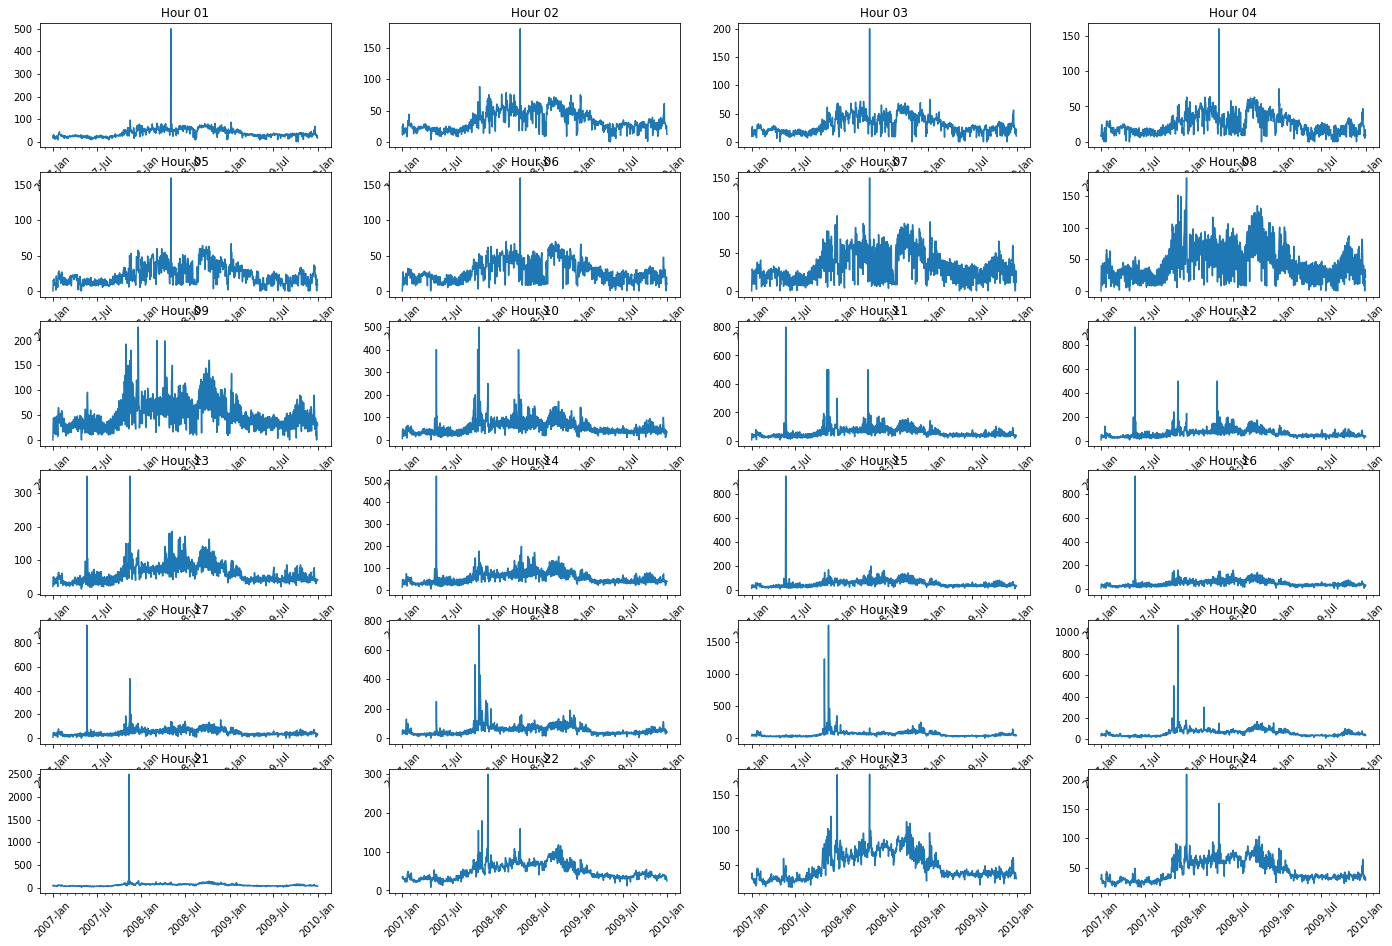

In [44]:
def plot_series(dataframe):
    fig, axes = plt.subplots(6, 4, figsize=(24,16))
    for ax, hour in zip(axes.flat, data_cols):
        ax.plot(dataframe.PRICES.values, dataframe[hour].values, label=hour)
        ax.set_title(hour)
        ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
        ax.xaxis.set_minor_locator(mdates.MonthLocator())
        ax.set_xticklabels(dataframe.PRICES.values, rotation=45)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    plt.show()

plot_series(df)

In [45]:
df[data_cols].corr().unstack().sort_values().drop_duplicates()[-20:]
# get most similar hours

Hour 14  Hour 16    0.923244
Hour 05  Hour 03    0.924136
Hour 13  Hour 10    0.924184
Hour 24  Hour 22    0.925374
Hour 06  Hour 05    0.929336
Hour 07  Hour 08    0.931795
Hour 22  Hour 23    0.939665
Hour 14  Hour 15    0.940848
Hour 17  Hour 15    0.942123
Hour 11  Hour 12    0.946378
Hour 08  Hour 09    0.948890
Hour 16  Hour 17    0.949888
Hour 14  Hour 13    0.955295
Hour 10  Hour 11    0.955743
Hour 03  Hour 04    0.960107
Hour 04  Hour 05    0.960751
Hour 03  Hour 02    0.966228
Hour 24  Hour 23    0.969491
Hour 16  Hour 15    0.992610
Hour 01  Hour 01    1.000000
dtype: float64

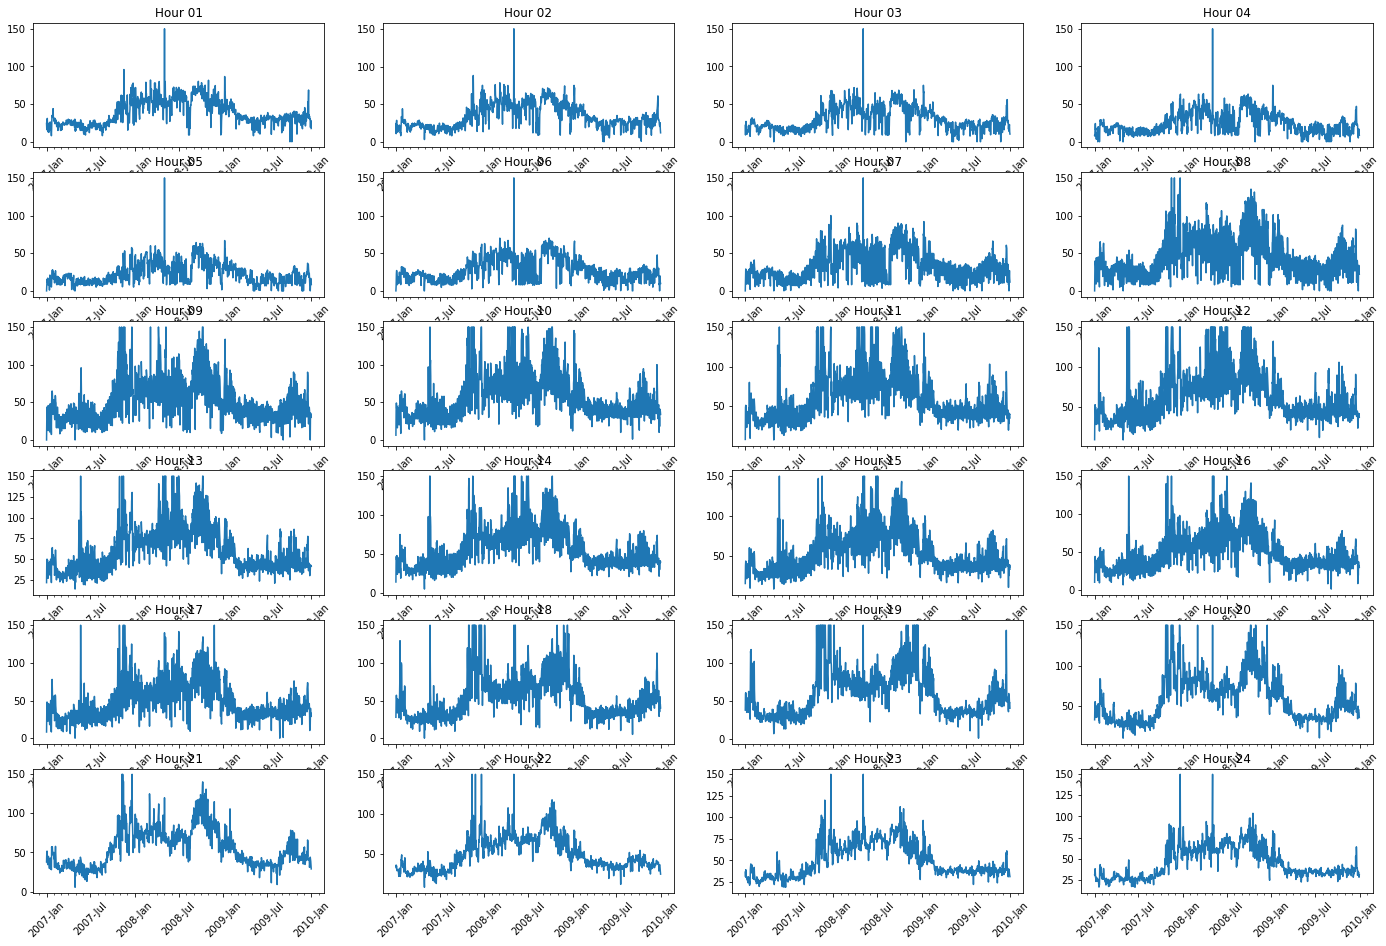

In [46]:
df_processed = df.copy()
for hour in data_cols:
    df_processed.loc[(df_processed[hour] > 150), hour] = 150
    
plot_series(df_processed)

In [47]:
df_processed[data_cols].corr().unstack().sort_values().drop_duplicates()[-20:]


Hour 10  Hour 09    0.959997
Hour 05  Hour 04    0.960301
Hour 16  Hour 13    0.960699
Hour 09  Hour 08    0.961767
Hour 03  Hour 02    0.966338
Hour 11  Hour 14    0.966572
Hour 01  Hour 02    0.967381
Hour 12  Hour 14    0.967429
Hour 17  Hour 16    0.968694
Hour 23  Hour 24    0.970533
Hour 15  Hour 13    0.971023
Hour 12  Hour 13    0.971883
Hour 14  Hour 16    0.973377
Hour 13  Hour 11    0.976754
Hour 12  Hour 11    0.979993
Hour 13  Hour 14    0.982413
Hour 15  Hour 14    0.984550
Hour 10  Hour 11    0.985684
Hour 15  Hour 16    0.987461
Hour 01  Hour 01    1.000000
dtype: float64

In [53]:
# add distance from summer
deltas = abs(relativedelta.relativedelta(train.PRICES, datetime.strptime('2007/07/01', "%Y/%m/%d")).months)
train['summer_dist'] = deltas

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

dtype('<M8[ns]')